In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
from tqdm import tqdm
from keras import backend as K
from random import shuffle
from keras.layers import Input, Dense, Lambda, Layer, Add, Multiply
from keras.models import Model, Sequential
from keras.datasets import mnist
import os
import cv2
from keras.models import load_model

In [14]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import metrics

In [15]:
original_dim = 12288
intermediate_dim = 512
latent_dim = 2
batch_size = 256
epochs = 250
epsilon_std = 1.0

In [16]:

x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)


In [17]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [18]:
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])


In [19]:
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

In [20]:
vae = Model(x, x_decoded_mean)


In [21]:
xent_loss = original_dim * metrics.binary_crossentropy(x, x_decoded_mean)
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)


In [22]:
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop',loss=None)
vae.summary()

C:\Users\lenovo-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Output "dense_10" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "dense_10" during training.
  


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 12288)        0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 512)          6291968     input_2[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 2)            1026        dense_6[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 2)            1026        dense_6[0][0]                    
__________________________________________________________________________________________________
lambda_2 (

In [23]:
import os
import cv2 
datadir = "E:\image1"
training_data = []
for img in tqdm(os.listdir(datadir)):
    
    path = os.path.join(datadir,img)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (64,64))
    training_data.append([np.array(img)])
shuffle(training_data)
np.save('train_data1.npy', training_data)
split = 0.8
ind = math.floor(split * len(training_data))
train = training_data[-ind:]
test = training_data[ind:]
print(len(train),len(test))

100%|██████████████████████████████████████████████████████████████████████████████| 5072/5072 [00:53<00:00, 94.08it/s]


4057 1015


In [24]:
X = np.array([i[0] for i in train]).reshape(-1,original_dim)/255.
print(X.shape)
test_x = np.array([i[0] for i in test]).reshape(-1,original_dim)/255.

(4057, 12288)


In [25]:
vae.fit(X,
        shuffle=True,
        epochs=epochs,
        batch_size = batch_size,
        verbose = 2,
validation_data=(test_x, None))

yay
Train on 4057 samples, validate on 1015 samples
Epoch 1/250
 - 18s - loss: 12636.8054 - val_loss: 7850.7906
Epoch 2/250
 - 15s - loss: 10537.8345 - val_loss: 8806.6719
Epoch 3/250
 - 16s - loss: 8079.4560 - val_loss: 7906.4005
Epoch 4/250
 - 16s - loss: 7683.3523 - val_loss: 7719.6668
Epoch 5/250
 - 15s - loss: 7624.2507 - val_loss: 7655.2022
Epoch 6/250
 - 14s - loss: 7631.7465 - val_loss: 7725.0086
Epoch 7/250
 - 14s - loss: 7700.1629 - val_loss: 7669.8573
Epoch 8/250
 - 15s - loss: 7782.5418 - val_loss: 7677.3341
Epoch 9/250
 - 15s - loss: 7735.7199 - val_loss: 7843.8127
Epoch 10/250
 - 16s - loss: 7764.1270 - val_loss: 7687.9419
Epoch 11/250
 - 15s - loss: 7755.9855 - val_loss: 8106.5057
Epoch 12/250
 - 16s - loss: 7818.9846 - val_loss: 7613.1289
Epoch 13/250
 - 18s - loss: 7730.2902 - val_loss: 7719.6452
Epoch 14/250
 - 18s - loss: 7628.5560 - val_loss: 7481.5414
Epoch 15/250
 - 18s - loss: 7706.5459 - val_loss: 7561.6796
Epoch 16/250
 - 18s - loss: 7567.1028 - val_loss: 7637.

Epoch 136/250
 - 18s - loss: 7221.2868 - val_loss: 7213.5138
Epoch 137/250
 - 18s - loss: 7216.5380 - val_loss: 7221.1249
Epoch 138/250
 - 18s - loss: 7218.0125 - val_loss: 7201.0109
Epoch 139/250
 - 18s - loss: 7217.1492 - val_loss: 7220.8183
Epoch 140/250
 - 21s - loss: 7219.1612 - val_loss: 7222.3748
Epoch 141/250
 - 19s - loss: 7216.6073 - val_loss: 7238.0360
Epoch 142/250
 - 20s - loss: 7212.2697 - val_loss: 7255.5281
Epoch 143/250
 - 17s - loss: 7213.8916 - val_loss: 7211.2450
Epoch 144/250
 - 18s - loss: 7212.1593 - val_loss: 7225.9162
Epoch 145/250
 - 19s - loss: 7214.2771 - val_loss: 7249.6628
Epoch 146/250
 - 20s - loss: 7218.3006 - val_loss: 7230.4978
Epoch 147/250
 - 17s - loss: 7207.2606 - val_loss: 7247.4301
Epoch 148/250
 - 17s - loss: 7212.1420 - val_loss: 7194.6065
Epoch 149/250
 - 17s - loss: 7215.2649 - val_loss: 7214.6100
Epoch 150/250
 - 17s - loss: 7208.4741 - val_loss: 7216.2743
Epoch 151/250
 - 17s - loss: 7212.5293 - val_loss: 7230.2144
Epoch 152/250
 - 17s - l

In [26]:

encoder = Model(x, z_mean)

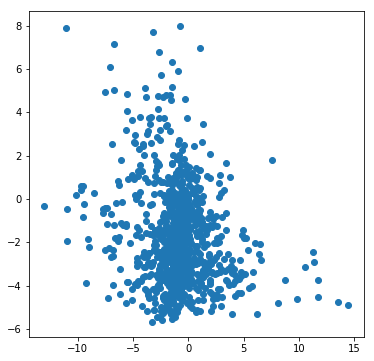

In [27]:
x_test_encoded = encoder.predict(test_x, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1],)

plt.show()

In [28]:
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)



In [44]:
n = 10# figure with 10x10 faces
face_size = 64
#figure = np.zeros((face_size * n, face_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian

# change values below to generate new images
grid_x = np.linspace(-10, 10, 5)
grid_y = np.linspace(-10, 10, n)

# code to create a result.png with generated faces
plt.figure(figsize=(10, 5))
for i, xi in enumerate(grid_x):
    for j, yi in enumerate(grid_y):
        #print(i,j,xi,yi)
        z_sample = np.array([[ xi,yi]])
        x_decoded = generator.predict(z_sample)
        #print(x_decoded[0].shape)
        x_decoded = x_decoded
        #print x_decoded.shape
        face = x_decoded[0].reshape(face_size, face_size, 3)
        ax = plt.subplot(5, 10, (i*10)+j+1)
        plt.imshow(face)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.savefig('result4.png')
